In [1]:
import pandas as pd
import numpy as np
import warnings
from six.moves import urllib
warnings.filterwarnings("ignore")

%matplotlib inline

# Increase the accuracy of the SVC model(Red wine quality)

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
X=data.drop("quality",axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
y=data["quality"]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split #test data is used to validate data
X_train,X_test,y_train,y_test=train_test_split(
X,y,test_size=0.33,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train=scaler.transform(X_train)
print(scaler.mean_)

[ 8.30345472  0.53246499  0.26933707  2.54691877  0.08772736 15.91223156
 46.76330532  0.99677933  3.31453782  0.65881419 10.41521942]


In [13]:
from sklearn.svm import SVC
model1=SVC()

In [14]:
model1.fit(X_train,y_train)

SVC()

In [15]:
model1.score(X_train,y_train)

0.6778711484593838

In [16]:
X_test=scaler.transform(X_test)
model1.score(X_test,y_test)

0.5984848484848485

In [17]:
y_predict=model1.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score


In [19]:
accuracy_score(y_test,y_predict)

0.5984848484848485

**Accuracy is 59.84%**

**Lets increase the accuracy**

In [20]:
from sklearn.model_selection import train_test_split #test data is used to validate data
X_train,X_test,y_train,y_test=train_test_split(
X,y,test_size=0.33,random_state=30)

In [21]:
scaler.fit(X_train)

StandardScaler()

In [22]:
X_train_tf=scaler.transform(X_train)

In [23]:
X_train_tf

array([[-0.15399524,  1.41485069, -0.22405969, ...,  0.4153471 ,
        -0.56587839,  0.8580993 ],
       [-0.50145781,  1.35884548, -0.38110676, ..., -0.71065418,
        -0.44947471, -1.14057284],
       [-1.37011425,  0.07072554, -1.11399309, ..., -0.04830049,
        -0.91508943,  0.14428782],
       ...,
       [-0.32772653, -0.04128489, -0.11936164, ...,  0.81275931,
        -0.04206183, -1.33092257],
       [ 0.88839248, -1.44141526,  1.13701493, ..., -0.77688955,
        -0.79868575,  2.00019766],
       [-1.02265168,  1.75088198, -1.27104016, ...,  1.40887764,
        -0.56587839,  1.80984793]])

In [24]:
X_train_tf=scaler.fit_transform(X_train)

In [25]:
X_train_tf

array([[-0.15399524,  1.41485069, -0.22405969, ...,  0.4153471 ,
        -0.56587839,  0.8580993 ],
       [-0.50145781,  1.35884548, -0.38110676, ..., -0.71065418,
        -0.44947471, -1.14057284],
       [-1.37011425,  0.07072554, -1.11399309, ..., -0.04830049,
        -0.91508943,  0.14428782],
       ...,
       [-0.32772653, -0.04128489, -0.11936164, ...,  0.81275931,
        -0.04206183, -1.33092257],
       [ 0.88839248, -1.44141526,  1.13701493, ..., -0.77688955,
        -0.79868575,  2.00019766],
       [-1.02265168,  1.75088198, -1.27104016, ...,  1.40887764,
        -0.56587839,  1.80984793]])

In [26]:
print(scaler.mean_)

[ 8.3659197   0.52737162  0.27280112  2.49327731  0.08704855 15.21521942
 44.69701214  0.99678087  3.30729225  0.65722689 10.39839714]


In [27]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [28]:
from sklearn.svm import SVC
model2=SVC()

In [29]:
model2.fit(X_train_tf,y_train)

SVC()

In [30]:
model2.score(X_train_tf,y_train)

0.6647992530345471

In [31]:
X_test_tf=scaler.transform(X_test)

In [32]:
model2.score(X_test_tf,y_test)

0.6534090909090909

In [33]:
y_predict2=model2.predict(X_test_tf)

In [34]:
y_test

1147    7
659     4
871     5
1333    5
1411    6
       ..
894     6
329     5
1002    7
1135    6
1093    7
Name: quality, Length: 528, dtype: int64

In [35]:
accuracy_score(y_test,y_predict2)

0.6534090909090909

**The maximum accuracy achieved for the model is 65.34%**

# 2. Hyperparameter Tunning(GridSearch CV) 

GridSearchCV

In [36]:
from sklearn.linear_model import LogisticRegression
model3= LogisticRegression(random_state = 30)
model3.fit(X_train, y_train)

LogisticRegression(random_state=30)

In [37]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [38]:
model4=GridSearchCV(model3,param_grid=parameter,scoring='accuracy',cv=15)

In [39]:
model4.fit(X_train,y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(random_state=30),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [40]:
print(model4.best_params_)

{'C': 6, 'max_iter': 200, 'penalty': 'l2'}


In [41]:
print(model4.best_score_)

0.5929577464788733


In [42]:
y_pred3 = model4.predict(X_test)

**Accuracy**

In [43]:
from sklearn.metrics import accuracy_score,classification_report
score1=accuracy_score(y_pred3,y_test)
print(score1)

0.5946969696969697


In [44]:
#Classification Report
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.74      0.69      0.72       239
           6       0.64      0.54      0.59       249
           7       0.22      0.35      0.27        40
           8       0.00      0.00      0.00         0

    accuracy                           0.59       528
   macro avg       0.27      0.26      0.26       528
weighted avg       0.65      0.59      0.62       528



# 3. IMPLEMENT SVR(ADDIMISSOIN_PREDICTION)

In [45]:
df=pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [46]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [47]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [48]:
for i in df.columns:
    df.rename(columns={i:i.strip()},inplace=True)
    
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [50]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [51]:
x=df.drop("Chance of Admit",axis=1)
x.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [52]:
y=df["Chance of Admit"]
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [53]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error 

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=50, test_size=0.20)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_tf = scaler.fit_transform(x_train)
x_test_tf = scaler.transform(x_test)

In [56]:
from sklearn.svm import SVR
svr = SVR()
model5=SVR(kernel='rbf')
model5.fit(x_train_tf,y_train)

SVR()

In [57]:
y_pred4 = model5.predict(x_test_tf)

In [58]:
def svr_result(y_test, x_test_tf, fitted_svr_model):
    
    print("C: {}".format(fitted_svr_model.C))
    print("Epsilon: {}".format(fitted_svr_model.epsilon))
    
    print("Intercept: {:,.3f}".format(fitted_svr_model.intercept_[0]))
    print("Coefficient: {:,.3f}".format(fitted_svr_model.coef_[0]))
    
    mae = mean_absolute_error(y_test, fitted_svr_model.predict(x_test_tf))
    print("MAE = ${:,.2f}".format(1000*mae))
    
    perc_within_eps = 100*np.sum(y_test - fitted_svr_model.predict(x_test_tf) < eps) / len(y_test)
    print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))
    
    # Plot outputs
    plt.figure(figsize=(10,7))
    plt.scatter(x=df['Chance of Admit'], y=df['University Rating'])
    plt.plot(x_test_tf, fitted_svr_model.predict(x_test_tf), color='red')
    plt.plot(x_test_tf, fitted_svr_model.predict(x_test_tf)+eps, color='black')
    plt.plot(x_test_tf, fitted_svr_model.predict(x_test_tf)-eps, color='black')
    plt.xlabel('Chance of Admit')
    plt.ylabel('University Rating')
    plt.title('SVR Prediction')
    plt.show()

In [59]:
from sklearn.svm import LinearSVR
eps = 5
svr = LinearSVR(epsilon=eps, C=1, fit_intercept=True)

In [60]:
svr.fit(x_train_tf, y_train)

LinearSVR(C=1, epsilon=5)

C: 1
Epsilon: 5
Intercept: 0.000
Coefficient: 0.000
MAE = $732.20
Percentage within Epsilon = 100.00%


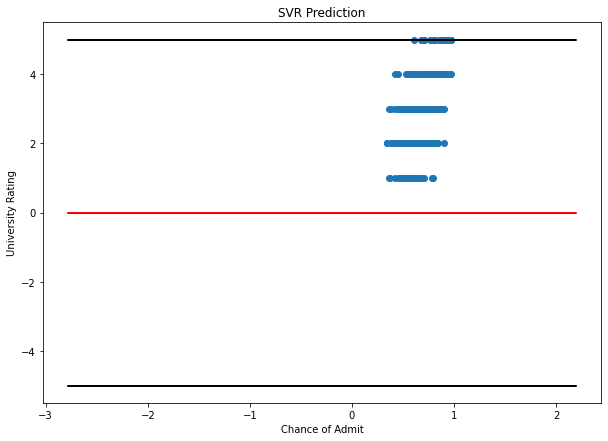

In [61]:
svr_result(y_test, x_test_tf, svr)

In [62]:
model5.score(x_test_tf,y_test)

0.7797970857881774